<a href="https://colab.research.google.com/github/sudeepjd/Data-Analytics/blob/master/08-Computer%20Vision/Basic_Image_Detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Image Detections

## Import the Libraries

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## Read the Image

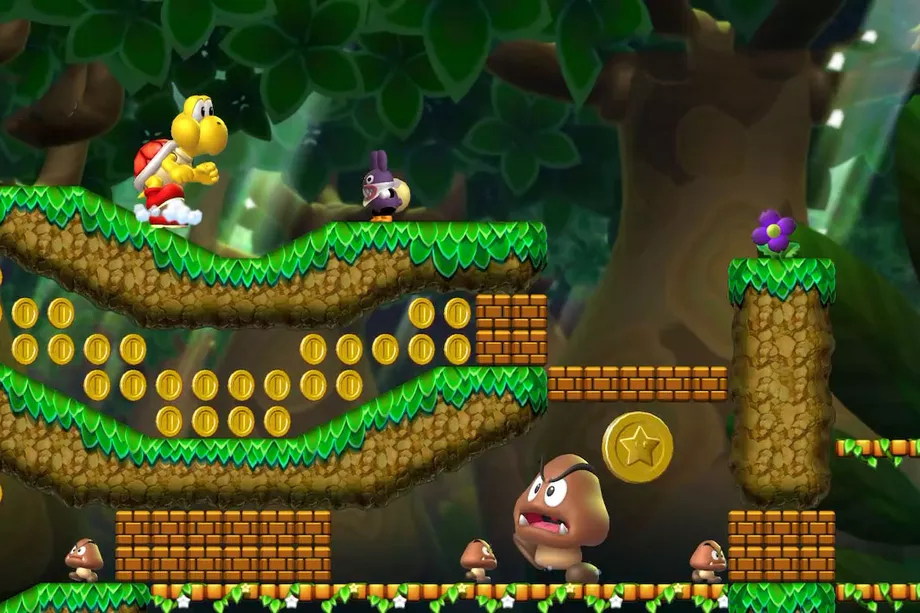

In [3]:
base_img = cv2.imread('Mario_bros.jpg')
cv2_imshow(base_img)

## Edge Detection - Canny Edge

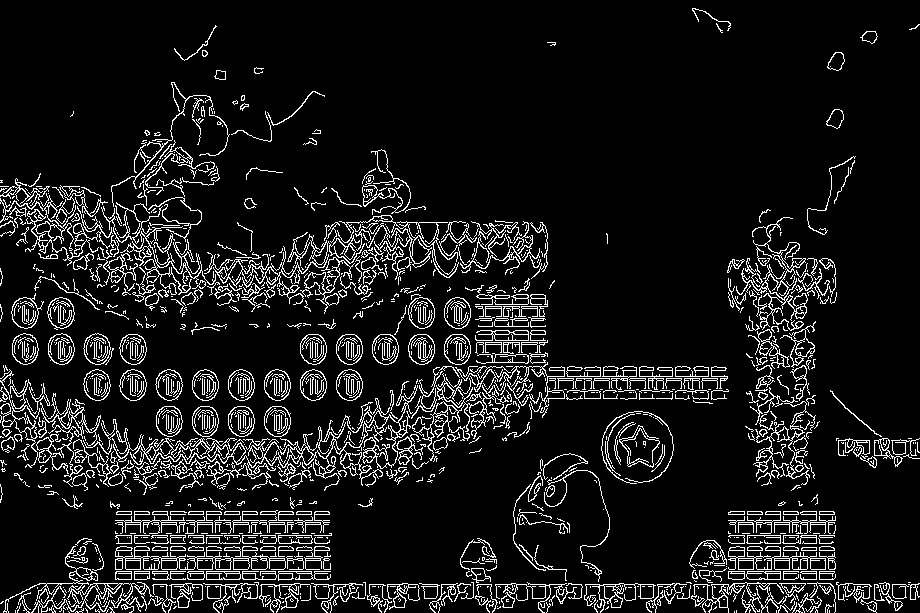

In [12]:
img_gray = cv2.cvtColor(base_img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(img_gray, 100, 200)
cv2_imshow(edges)

## Line Detection

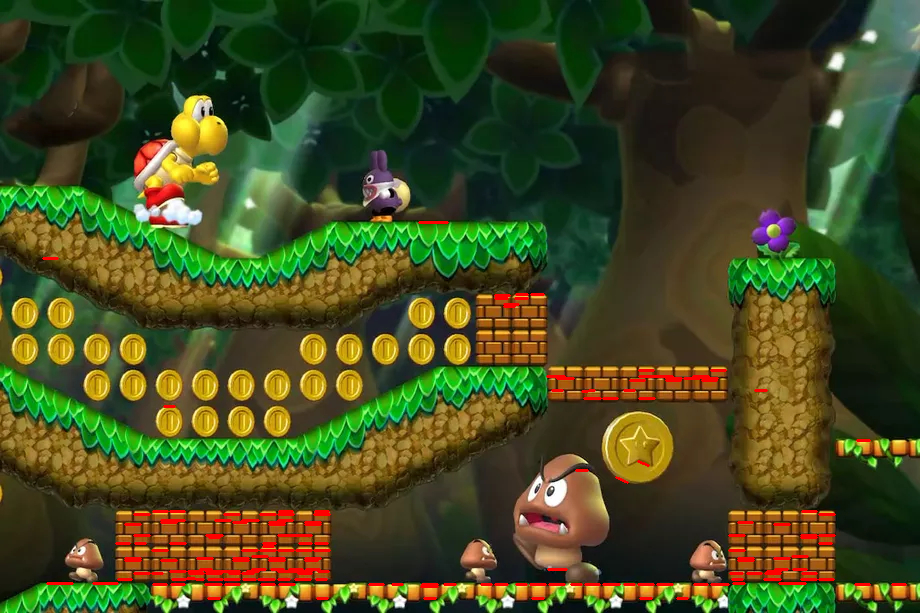

In [19]:
img = base_img.copy()
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)
for line in lines:
  for x1, y1, x2, y2 in line:
      cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)
cv2_imshow(img)

## Circle Detection

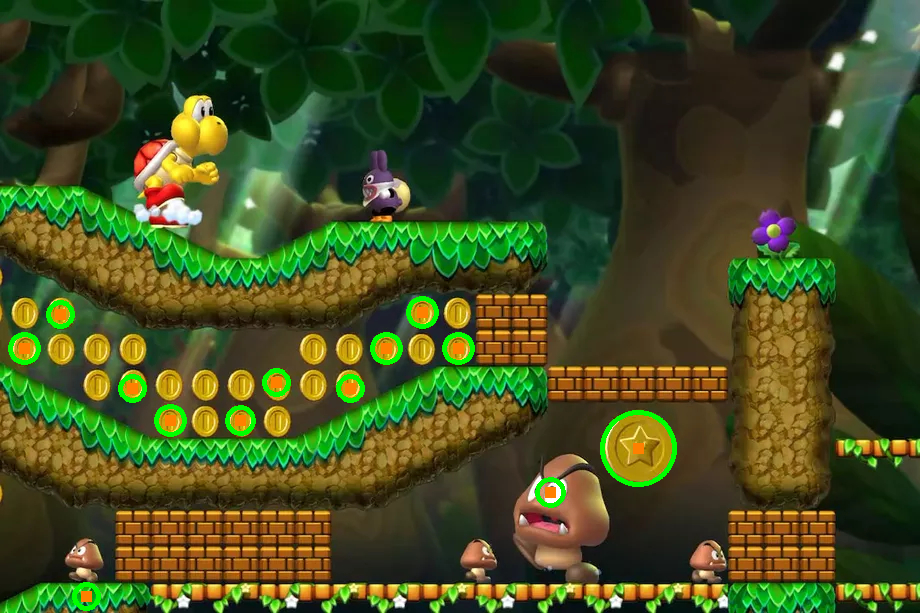

In [51]:
img = base_img.copy()
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 40, param1 = 490, param2 = 24, minRadius = 10, maxRadius = 40)

if circles is not None:
  # convert the (x, y) coordinates and radius of the circles to integers
  circles = np.round(circles[0, :]).astype("int")

  for (x, y, r) in circles:
    # draw the circle in the output image, then draw a rectangle corresponding to the center of the circle
    cv2.circle(img, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
  
cv2_imshow(img)